# 데이콘 Basic 칼로리 소모량 예측 AI 경진대회(미니프로젝트5)

프로젝트의 목적

- 딥러닝 모델 구현해보기
- 하이퍼 파라미터의 역할을 이해하고 조절하면서 최적의 값을 찾아보기

## 데이터 확인

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
!unzip open.zip

Archive:  open.zip
replace open/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace open/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace open/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [9]:
train = pd.read_csv('open/train.csv')
print(train.shape)
train.head()

(7500, 11)


,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


In [10]:
test = pd.read_csv('open/test.csv')
print(test.shape)
test.head()

(7500, 10)


,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,Overweight,M,35
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,Normal Weight,F,67


In [11]:
# 결측치 확인
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [12]:
# 중복값 확인
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [13]:
# 기술통계값
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [14]:
train.dtypes

ID                           object
Exercise_Duration           float64
Body_Temperature(F)         float64
BPM                         float64
Height(Feet)                float64
Height(Remainder_Inches)    float64
Weight(lb)                  float64
Weight_Status                object
Gender                       object
Age                           int64
Calories_Burned             float64
dtype: object

In [15]:
train['Weight_Status'].unique()

array(['Normal Weight', 'Overweight', 'Obese'], dtype=object)

In [16]:
# 체중 상태에 따른 비율

# 비만인 경우가 상대적으로 적다는 것을 알수있다.
train['Weight_Status'].value_counts(1)

Normal Weight    0.624133
Overweight       0.348533
Obese            0.027333
Name: Weight_Status, dtype: float64

## 범주형 데이터를 수치형 데이터로 변환(원핫인코딩)

In [ ]:
train = pd.get_dummies(train, columns=['Weight_Status'])
test = pd.get_dummies(test, columns=['Weight_Status'])
train.head(1)

In [19]:
train['Gender'].unique()

array(['F', 'M'], dtype=object)

In [20]:
train['Gender'].value_counts(1)

F    0.502533
M    0.497467
Name: Gender, dtype: float64

In [21]:
train = pd.get_dummies(train, columns=['Gender'])
test = pd.get_dummies(test, columns=['Gender'])
train.head(1)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned,Weight_Status_Normal Weight,Weight_Status_Obese,Weight_Status_Overweight,Gender_F,Gender_M
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,45,166.0,1,0,0,1,0


## 변수 조정 및 생성

In [57]:
# 1. 체중(lb)을 kg로 변환
train['Weight(kg)'] = train['Weight(lb)'] * 0.45359237
test['Weight(kg)'] = test['Weight(lb)'] * 0.45359237

# 2. 키(feet, inches)를 미터(m)로 변환
train['Height(cm)'] = (train['Height(Feet)'] * 30.48) + (train['Height(Remainder_Inches)'] * 2.54)
test['Height(cm)'] = (test['Height(Feet)'] * 30.48) + (test['Height(Remainder_Inches)'] * 2.54)

# 3. 체온을 섭씨로 변환
train['Body_Temperature(C)'] = (train['Body_Temperature(F)'] - 32)*(5/9)
test['Body_Temperature(C)'] = (test['Body_Temperature(F)'] - 32)*(5/9)

# 4. BMI 계산
train['BMI'] = 10000 * train['Weight(kg)'] / (train['Height(cm)'] ** 2)
test['BMI'] = 10000 * test['Weight(kg)'] / (test['Height(cm)'] ** 2)

# 5. 대사량변수(BMR) 생성
train['BMR'] = 10 * train['Weight(kg)'] + 6.25 * train['Height(cm)'] - 5 * train['Age'] + 5
test['BMR'] = 10 * test['Weight(kg)'] + 6.25 * test['Height(cm)'] - 5 * test['Age'] + 5

# 6. 심혈량(Cardiac Output) 생성
train['Cardiac Output'] = train['BPM'] * train['Exercise_Duration']
test['Cardiac Output'] = test['BPM'] * test['Exercise_Duration']


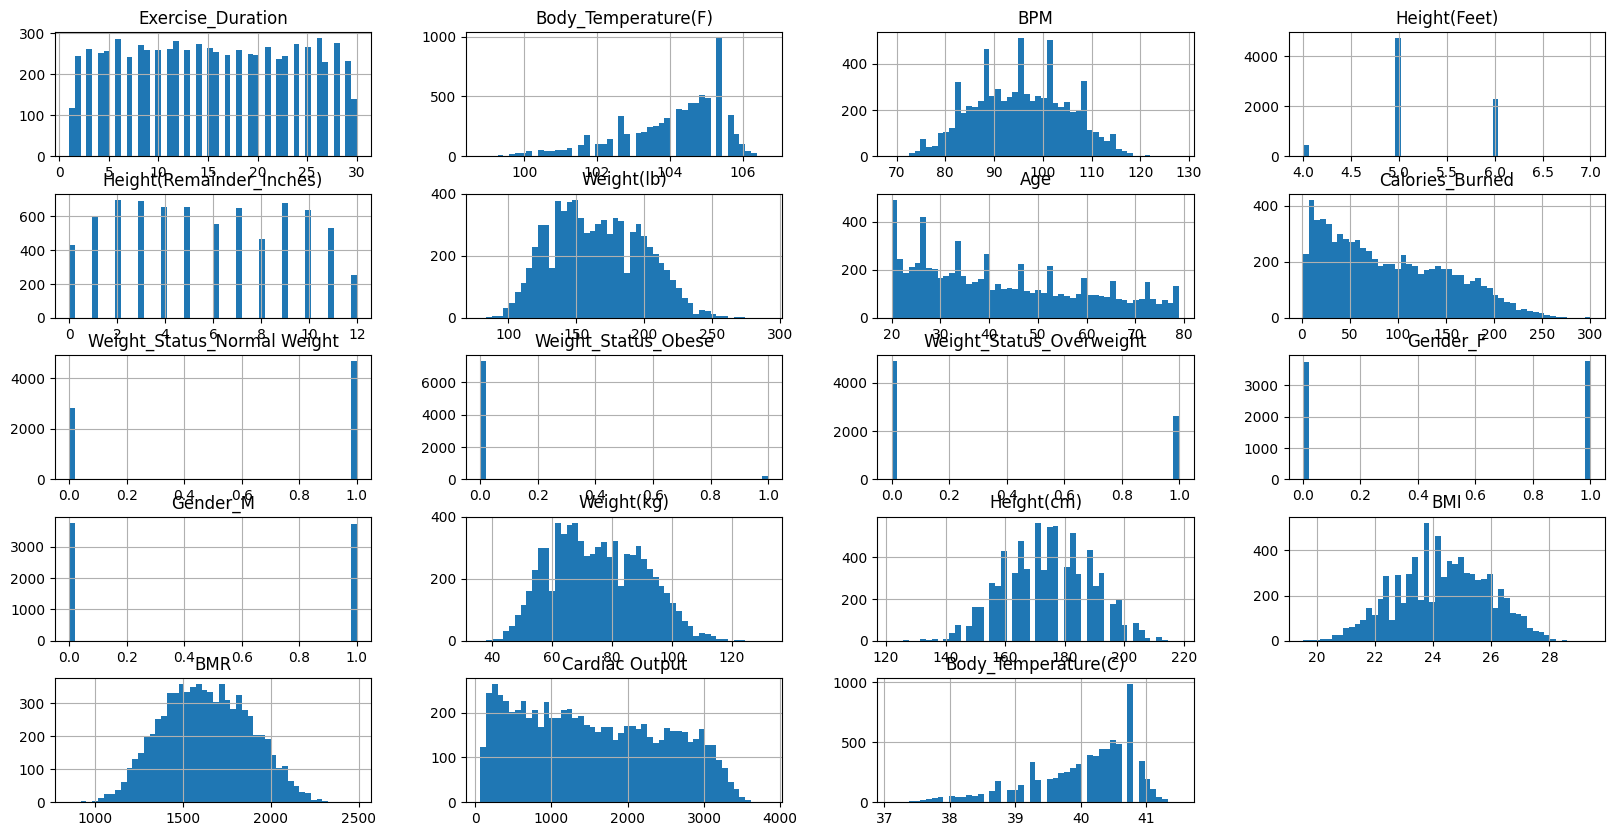

In [58]:
# 히스토그램으로 대략적인 분포 알아보기
train.hist(bins=50, figsize=(20, 10));

In [59]:
# 상관계수 확인
corr = train.corr(numeric_only=True)
corr

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned,Weight_Status_Normal Weight,Weight_Status_Obese,Weight_Status_Overweight,Gender_F,Gender_M,Weight(kg),Height(cm),BMI,BMR,Cardiac Output,Body_Temperature(C)
Exercise_Duration,1.000000,0.904314,0.853489,-0.004566,0.003649,0.002236,0.017734,0.954783,-0.015655,0.005310,0.014095,-0.007789,0.007789,0.002236,-0.003146,0.015120,-0.005815,0.993299,0.904314
Body_Temperature(F),0.904314,1.000000,0.770707,0.004248,-0.003311,0.007554,0.016474,0.824379,-0.014996,0.003367,0.014090,-0.012012,0.012012,0.007554,0.002979,0.017348,0.000070,0.878161,1.000000
BPM,0.853489,0.770707,1.000000,0.003110,0.004244,0.012562,0.014702,0.899900,-0.023626,0.000075,0.023989,-0.016898,0.016898,0.012562,0.006319,0.022658,0.004933,0.891663,0.770707
Height(Feet),-0.004566,0.004248,0.003110,1.000000,-0.536675,0.821749,0.015356,0.020780,-0.355408,0.096954,0.328079,-0.593454,0.593454,0.821749,0.852031,0.411041,0.803635,-0.003612,0.004248
Height(Remainder_Inches),0.003649,-0.003311,0.004244,-0.536675,1.000000,-0.025702,-0.011303,-0.004381,0.002119,-0.005403,-0.000305,-0.001421,0.001421,-0.025702,-0.015548,-0.018858,-0.017438,0.004919,-0.003311
Weight(lb),0.002236,0.007554,0.012562,0.821749,-0.025702,1.000000,0.090536,0.042568,-0.596259,0.111696,0.567849,-0.779709,0.779709,1.000000,0.957816,0.699669,0.924928,0.004184,0.007554
Age,0.017734,0.016474,0.014702,0.015356,-0.011303,0.090536,1.000000,0.159624,-0.181541,0.005552,0.182628,-0.006035,0.006035,0.090536,0.011184,0.250513,-0.281475,0.018414,0.016474
Calories_Burned,0.954783,0.824379,0.899900,0.020780,-0.004381,0.042568,0.159624,1.000000,-0.065473,0.005630,0.064624,-0.027619,0.027619,0.042568,0.021906,0.066542,-0.020517,0.974378,0.824379
Weight_Status_Normal Weight,-0.015655,-0.014996,-0.023626,-0.355408,0.002119,-0.596259,-0.181541,-0.065473,1.000000,-0.216016,-0.942536,0.586168,-0.586168,-0.596259,-0.419839,-0.789768,-0.453396,-0.017531,-0.014996
Weight_Status_Obese,0.005310,0.003367,0.000075,0.096954,-0.005403,0.111696,0.005552,0.005630,-0.216016,1.000000,-0.122614,-0.088348,0.088348,0.111696,0.111537,0.064487,0.106509,0.005988,0.003367


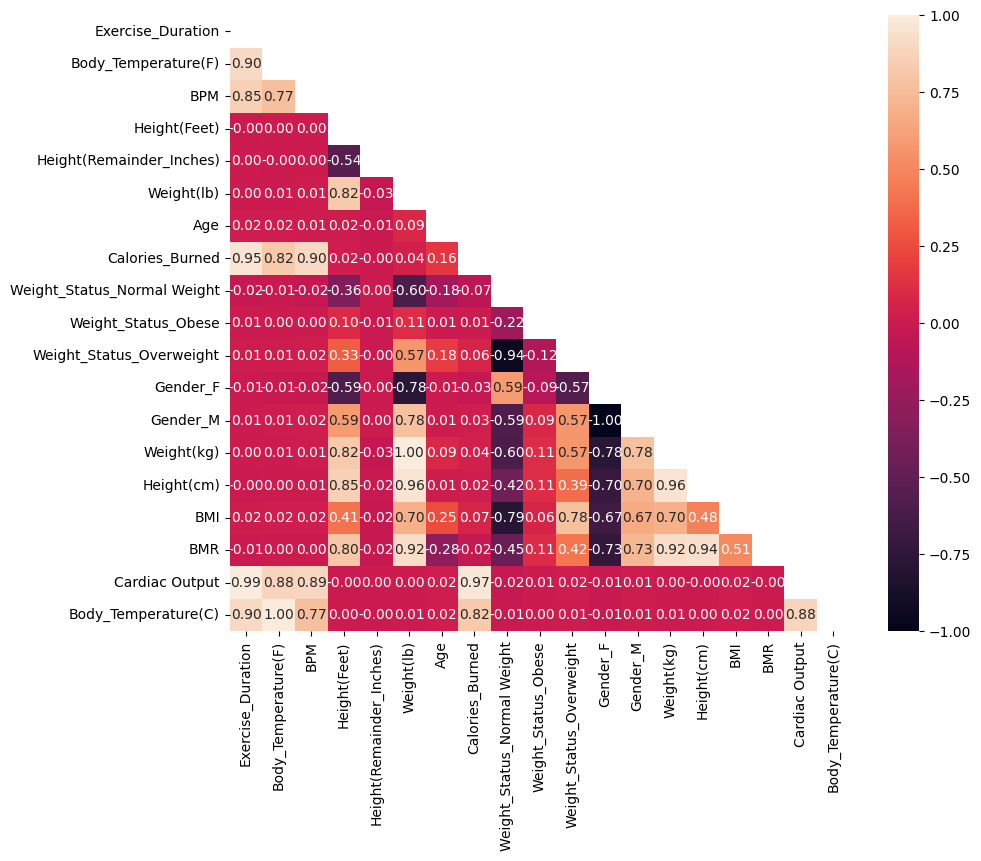

In [60]:
# 히트맵으로 상관계수 확인해보기
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask);

In [61]:
# target과의 상관계수 확인
train.corr(numeric_only=True)['Calories_Burned']

Exercise_Duration              0.954783
Body_Temperature(F)            0.824379
BPM                            0.899900
Height(Feet)                   0.020780
Height(Remainder_Inches)      -0.004381
Weight(lb)                     0.042568
Age                            0.159624
Calories_Burned                1.000000
Weight_Status_Normal Weight   -0.065473
Weight_Status_Obese            0.005630
Weight_Status_Overweight       0.064624
Gender_F                      -0.027619
Gender_M                       0.027619
Weight(kg)                     0.042568
Height(cm)                     0.021906
BMI                            0.066542
BMR                           -0.020517
Cardiac Output                 0.974378
Body_Temperature(C)            0.824379
Name: Calories_Burned, dtype: float64

상관계수와 히트맵을 확인한결과
몇 가지 변수들간의 상관관계가 높은것으로 파악됐다.

- 남녀 성별의 경우 상관계수가 -1로 완전히 종속적이다.
- 심박출량과 운동시간역시 0.99로 높은 상관관계를 가졌다.(심박출량은 BMP과 운동시간을 곱했기 때문)
- target 와의 상관관계 역시 심박출량, 운동시간, 체온, BPM과 높은 양의 상관관계를 갖고있다.
- 이외에 키, BMR, 성별은 상관관계가 낮은것으로 나타난다

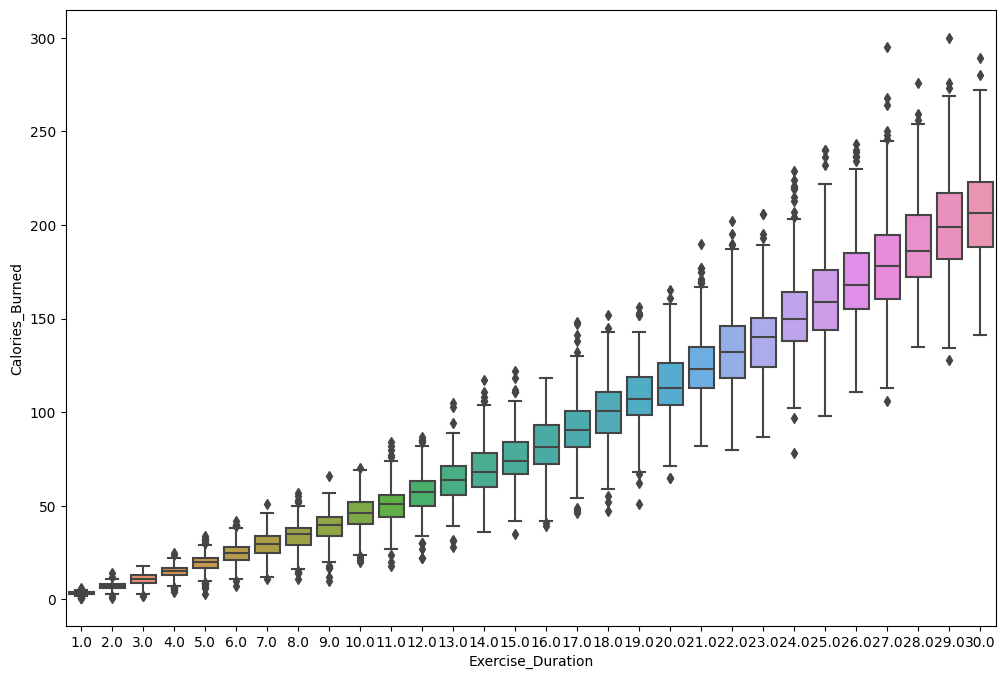

In [62]:
# 운동시간과 target 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x=train["Exercise_Duration"], y=train["Calories_Burned"]);

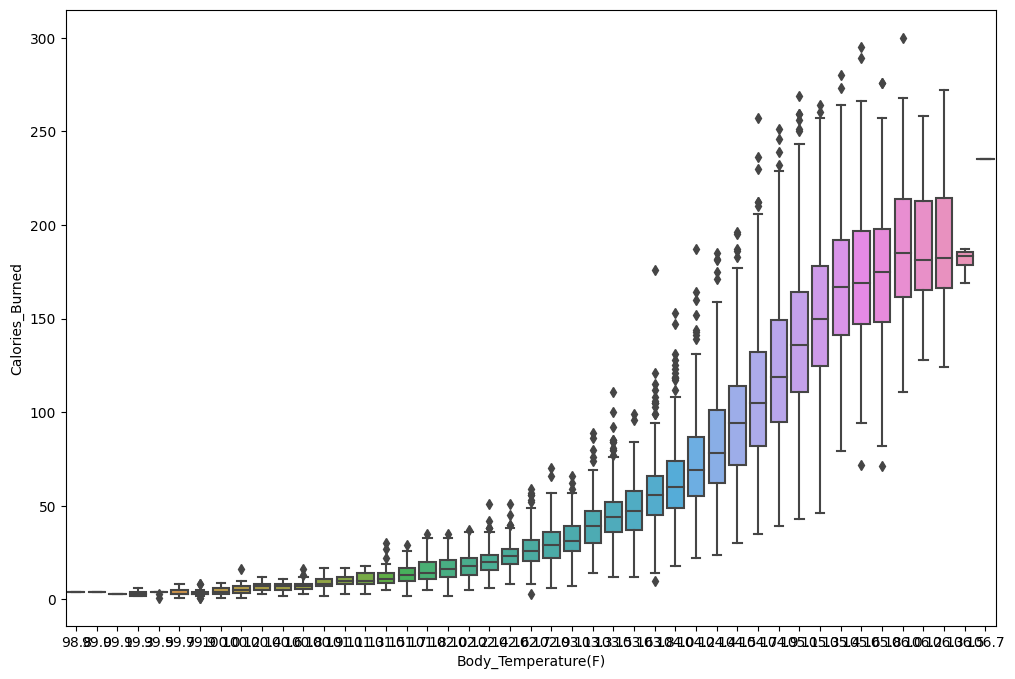

In [63]:
# 체온과 target 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x=train["Body_Temperature(F)"], y=train["Calories_Burned"]);

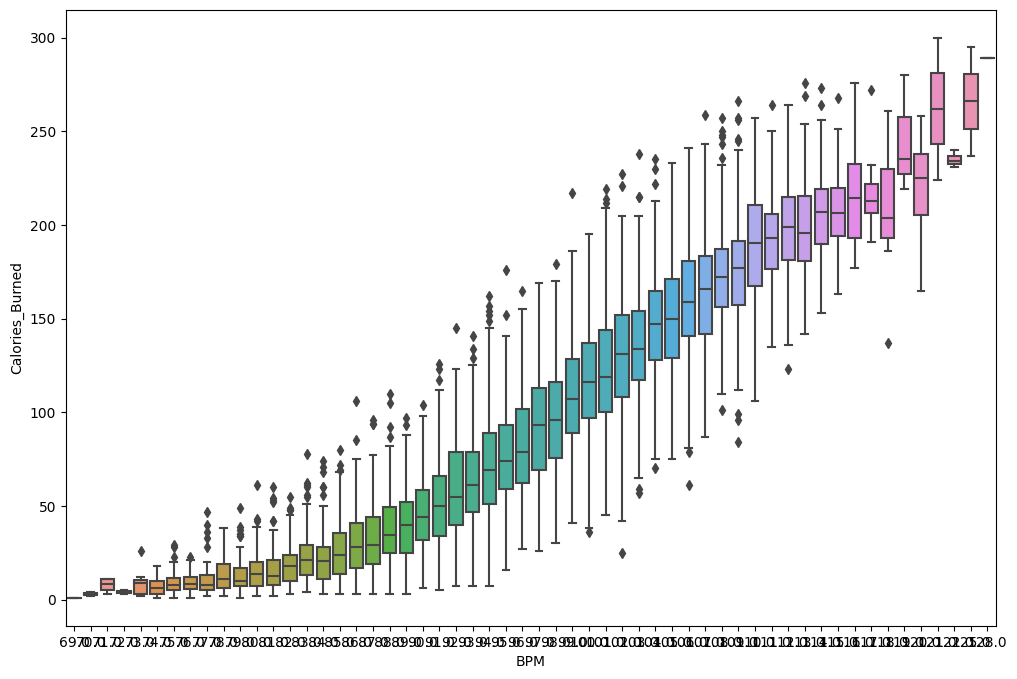

In [64]:
# BPM과 target 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x=train["BPM"], y=train["Calories_Burned"]);

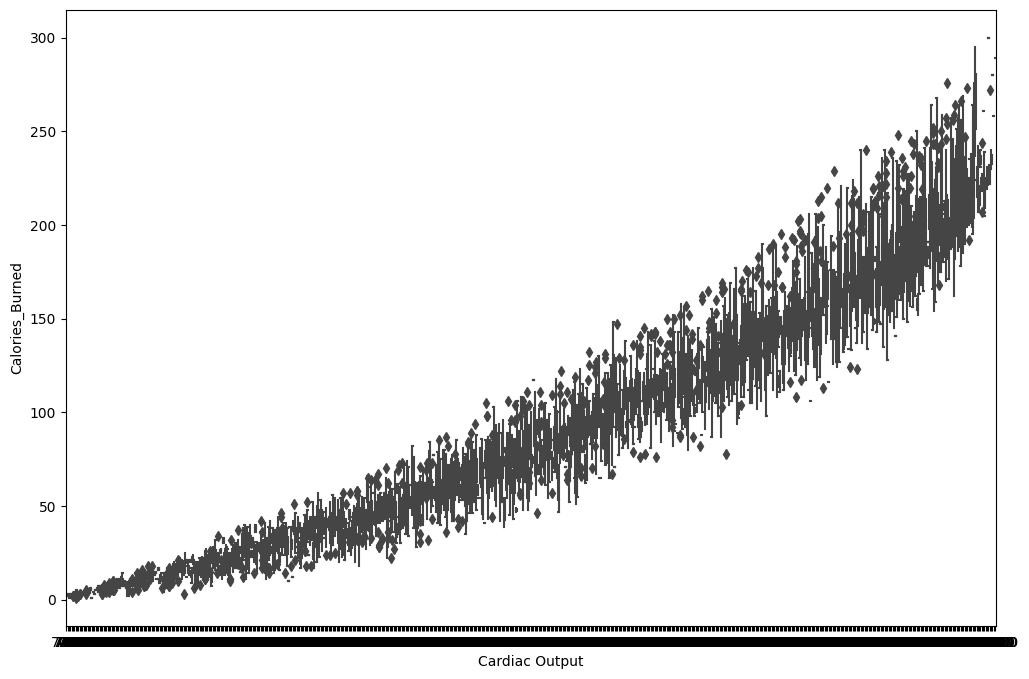

In [211]:
# 심박출량과 target 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x=train["Cardiac Output"], y=train["Calories_Burned"]);

상관계수가 높은 변수들과 target을 boxplot으로 시각화 했다.
몇몇 구간에서 이상치가 존재하긴하지만 histogram과 boxplot모두 고려했을때
이상치를 처리해야하지 않아도 되겠다고 판단했다.

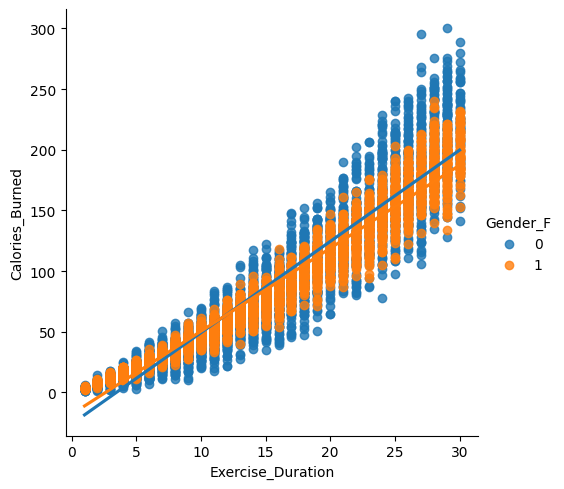

In [65]:
# 운동시간과 target과의 산점도를 남/녀 구분해서 시각화했다.
sns.lmplot(x='Exercise_Duration', y='Calories_Burned', data=train, hue='Gender_F')

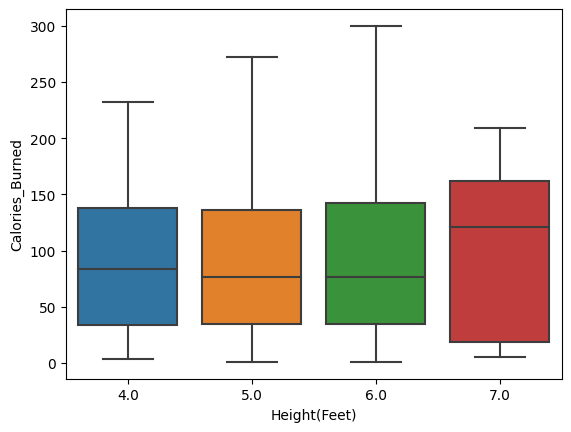

In [66]:
# 키 feet
sns.boxplot(x=train["Height(Feet)"], y=train["Calories_Burned"]);

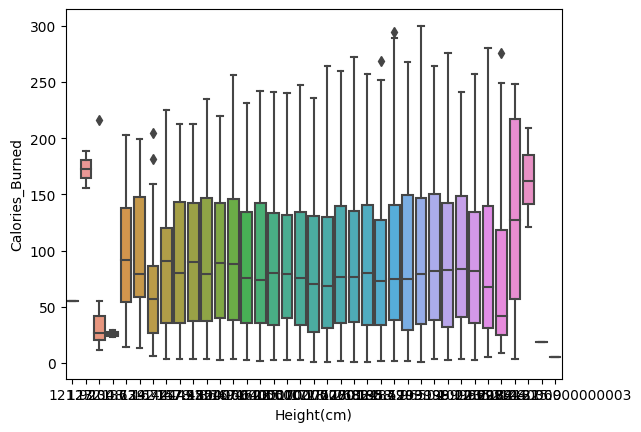

In [67]:
# 키 cm
sns.boxplot(x=train["Height(cm)"], y=train["Calories_Burned"]);

키 데이터를 예측에 사용할 경우 데이터가 세분화되어있는 cm를 쓰는게 좋다고 판단했다.

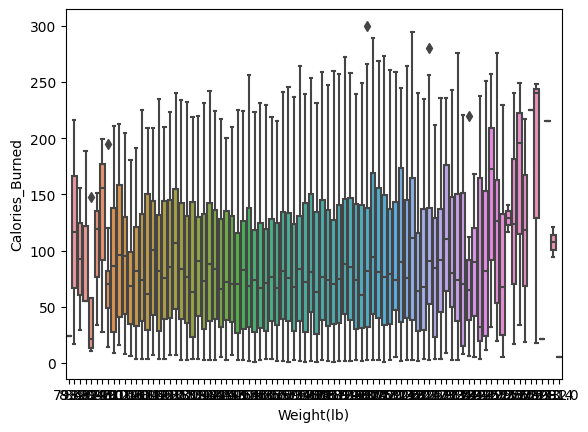

In [68]:
# 몸무게 파운드
sns.boxplot(x=train['Weight(lb)'], y=train["Calories_Burned"]);

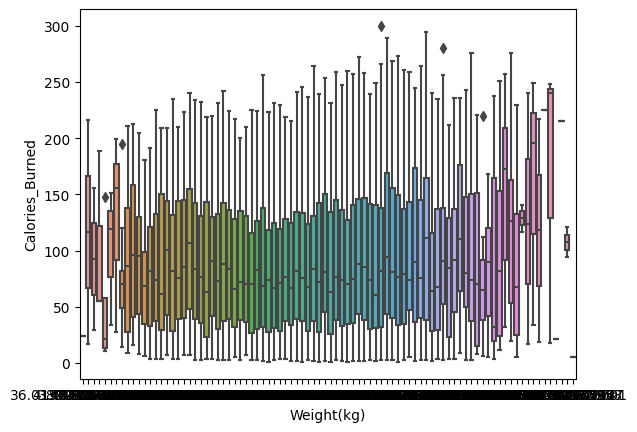

In [69]:
# 몸무게 kg
sns.boxplot(x=train['Weight(kg)'], y=train["Calories_Burned"]);

몸무게는 어떤 변수를 쓰든 상관없을것 같다.

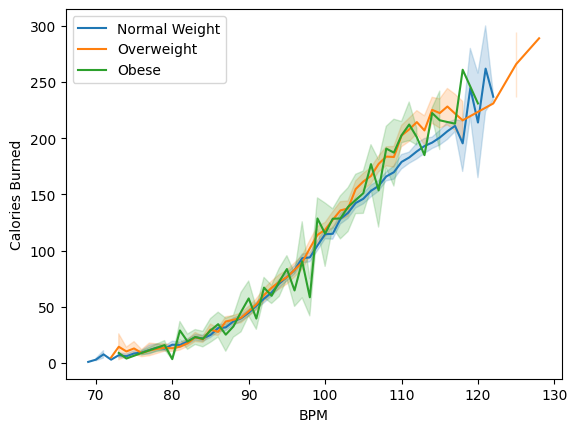

In [214]:
# BPM과 target과의 관계를 체중상태에 따라서 시각화
normal = train[train['Weight_Status_Normal Weight'] == 1]
overweight = train[train['Weight_Status_Overweight'] == 1]
obese = train[train['Weight_Status_Obese'] == 1]

sns.lineplot(x='BPM', y='Calories_Burned', data=normal, label='Normal Weight')
sns.lineplot(x='BPM', y='Calories_Burned', data=overweight, label='Overweight')
sns.lineplot(x='BPM', y='Calories_Burned', data=obese, label='Obese')

plt.xlabel('BPM')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

체중상태에 따라서 BPM과 target은 뚜렷한 구분이 없다고 판단해도 될 것 같다.

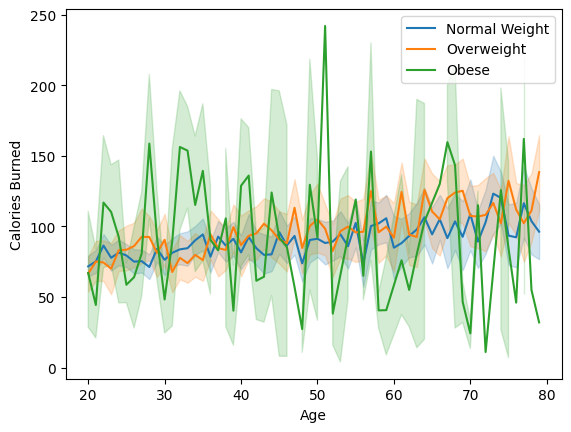

In [217]:
# 나이와 target과의 관계를 체중상태에 따라서 시각화
sns.lineplot(x='Age', y='Calories_Burned', data=normal, label='Normal Weight')
sns.lineplot(x='Age', y='Calories_Burned', data=overweight, label='Overweight')
sns.lineplot(x='Age', y='Calories_Burned', data=obese, label='Obese')

plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

나이와 target은 상관관계가 뚜렷하게 보이지 않는다.
특히 비만인 경우 그래프의 변동폭이 크기때문에 feature로 사용하기 어려워보인다.


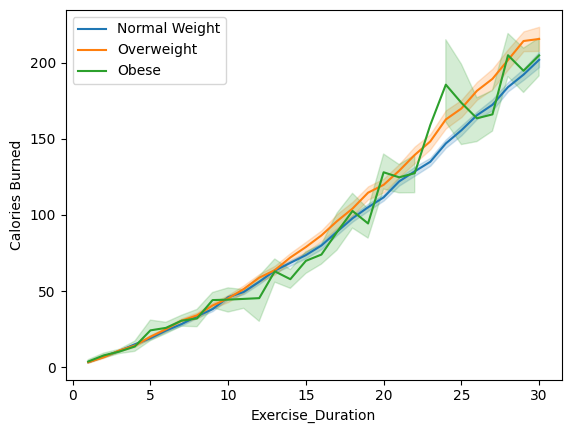

In [213]:
# 운동시간과 target과의 관계를 체중상태에 따라서 시각화
sns.lineplot(x='Exercise_Duration', y='Calories_Burned', data=normal_weight_data, label='Normal Weight')
sns.lineplot(x='Exercise_Duration', y='Calories_Burned', data=overweight_data, label='Overweight')
sns.lineplot(x='Exercise_Duration', y='Calories_Burned', data=obese_data, label='Obese')

plt.xlabel('Exercise_Duration')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

몇 가지 데이터를 더 확인해본결과 체중상태는 target을 예측하는데 중요한 역할을 하지 않는것으로 보인다.

## 데이터셋 나누기

In [71]:
train.columns

Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Age', 'Calories_Burned',
       'Weight_Status_Normal Weight', 'Weight_Status_Obese',
       'Weight_Status_Overweight', 'Gender_F', 'Gender_M', 'Weight(kg)',
       'Height(cm)', 'BMI', 'BMR', 'Cardiac Output', 'Body_Temperature(C)'],
      dtype='object')

In [151]:
# VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor


df = pd.concat([X_train, y_train], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns


vif[vif["VIF Factor"] > 10]

,VIF Factor,features
0,2.912162e+02,Exercise_Duration
2,1.004802e+01,BPM
3,7.825947e+07,Age
7,8.657269e+08,Weight(kg)
8,1.788512e+09,Height(cm)
9,2.249022e+01,BMI
10,4.049188e+09,BMR
11,4.868049e+02,Cardiac Output
12,6.502071e+01,Calories_Burned


In [178]:
# feature = ['Exercise_Duration', 'Body_Temperature(C)', 'BPM', 'Age',
#        'Weight_Status_Normal Weight', 'Weight_Status_Overweight', 'Gender_M', 'Weight(kg)',
#        'Height(cm)', 'BMI', 'Cardiac Output']

feature = ['Exercise_Duration', 'Body_Temperature(C)', 'BPM', 'Age', 'Gender_M', 'Weight(kg)', 'BMI']

feature를 선정할때 크게 3가지를 고려했다.
- 상관계수
- 시각화 그래프
- VIF(다중공선성 확인)
그리고 이외에도 여러가지 feature를 조합해서 모델링을 해본 후 최적이라고 판단한 feature를 선별했다.

In [179]:
target = 'Calories_Burned'

X = train[feature]
y = train[target]

X.shape, y.shape

((7500, 7), (7500,))

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6750, 7), (750, 7), (6750,), (750,))

In [181]:
X_test = test[feature]
X_test.shape

(7500, 7)

## 텐서플로우를 이용한 딥러닝 모델 구현

In [182]:
import tensorflow as tf

tf.__version__

'2.12.0'

1. 기본모델 구현

- 4개의 레이어
- optimizer adam
- early_stop

기대효과

- 하이퍼 파라미터를 최소한으로 설정하고 최적의 값을 찾기위해 이후에 조정할 예정

- 결과: 모델의 성능이 가장 좋게나왔다.
- 추측: target을 예측하기 위한 데이터가 단순하고 변수가 적기 때문에 오히려 기본적인 모델에서 가장 좋은 결과가 나온것이 아닐까..

In [218]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, y_train,
                    epochs=1000,
                    validation_data=(X_valid, y_valid),                    
                    callbacks=[early_stop], verbose=0)
history

In [219]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 64)                512       
                                                                 
 dense_179 (Dense)           (None, 32)                2080      
                                                                 
 dense_180 (Dense)           (None, 16)                528       
                                                                 
 dense_181 (Dense)           (None, 1)                 17        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


In [220]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
823,2.742903,1.174764,2.742903,1.815000,0.927503,1.815000
824,2.182099,1.049315,2.182099,1.944224,0.979820,1.944224
825,2.260593,1.057465,2.260593,1.655570,0.889034,1.655570
826,2.279708,1.062962,2.279708,2.348790,1.098898,2.348790
827,2.208332,1.060394,2.208332,2.518408,1.144871,2.518408


<Axes: >

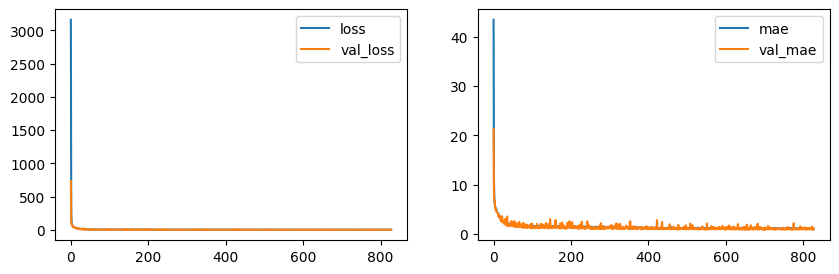

In [221]:
# loss plot

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["mae", "val_mae"]].plot(ax=axes[1])

In [222]:
# loss, mae, mse = model.evaluate
loss, mae, mse = model.evaluate(X_valid, y_valid)
loss, mae, mse

24/24 [==============================] - 0s 2ms/step - loss: 2.5184 - mae: 1.1449 - mse: 2.5184


(2.5184075832366943, 1.1448707580566406, 2.5184075832366943)

In [223]:
# predict
y_valid_pred = model.predict(X_valid).flatten()
y_valid_pred[:5]

24/24 [==============================] - 0s 2ms/step


array([ 19.63436 , 134.25694 , 120.60228 ,  13.554462,  19.835619],
      dtype=float32)

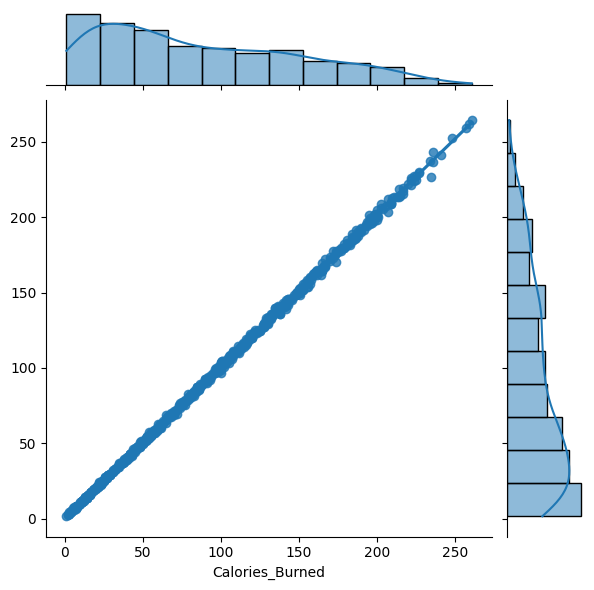

In [224]:
# jointplot
sns.jointplot(x=y_valid, y=y_valid_pred, kind="reg")

In [225]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, y_valid_pred)
r2

0.999368684843452

## 제출하기

In [226]:
# predict
y_predict = model.predict(X_test).flatten()
y_predict[:5]

235/235 [==============================] - 0s 2ms/step


array([175.65512 , 193.80467 ,  54.026733, 160.48668 , 226.11194 ],
      dtype=float32)

In [227]:
submission = pd.read_csv('open/sample_submission.csv')

submission[target] = y_predict

In [228]:
file_name = f"submit_tf_{r2:.5f}.csv"
file_name

'submit_tf_0.99937.csv'

In [230]:
submission.to_csv(file_name, index=False)
pd.read_csv(file_name).head(2)

,ID,Calories_Burned
0,TEST_0000,175.65512
1,TEST_0001,193.80467


In [231]:
from google.colab import files

files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2. 레이어와 유닛의 갯수를 늘려서 모델을 더 복잡하게 만들었다.

- 5개의 레이어
- 유닛(노드) 추가
- optimizer adam
- early_stop


기대효과

- 레이어와 유닛의 갯수가 증가하면 모델이 복잡해지기 때문에 더 정교한 예측을 하지 않을까?

- 결과: 모델의 성능은 거의 차이가 없었다.(아주 조금 떨어졌다)
- 추측: 과적합이 일어났을 가능성이 있다.(드롭아웃으로 성능을 개선해보기)

In [192]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, y_train,
                    epochs=1000,
                    validation_data=(X_valid, y_valid),                    
                    callbacks=[early_stop], verbose=0)
history

In [193]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
477,2.581598,1.140324,2.581598,1.933903,1.004122,1.933903
478,3.273591,1.282389,3.273591,2.123887,1.051798,2.123887
479,2.579691,1.140888,2.579691,2.083753,1.018544,2.083753
480,3.167645,1.242926,3.167645,16.122055,3.008770,16.122055
481,3.251710,1.261180,3.251710,2.524514,1.157419,2.524514


<Axes: >

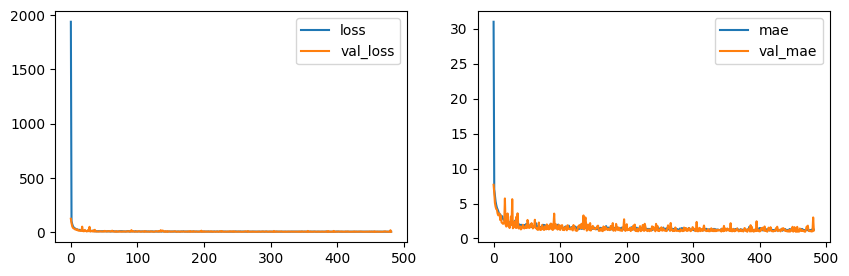

In [194]:
# loss plot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["mae", "val_mae"]].plot(ax=axes[1])

In [195]:
# loss, mae, mse = model.evaluate
loss, mae, mse = model.evaluate(X_valid, y_valid)
loss, mae, mse

24/24 [==============================] - 0s 2ms/step - loss: 2.5245 - mae: 1.1574 - mse: 2.5245


(2.5245139598846436, 1.157419204711914, 2.5245139598846436)

In [196]:
# predict
y_valid_pred = model.predict(X_valid).flatten()
y_valid_pred[:5]

24/24 [==============================] - 0s 2ms/step


array([ 19.744038, 132.49208 , 120.08872 ,  13.206333,  19.980602],
      dtype=float32)

In [197]:
r2 = r2_score(y_valid, y_valid_pred)
r2

0.9993671538044212

3. 드롭아웃을 추가했다.

- 5개의 레이어
- 2번의 드롭아웃
- optimizer adam
- early_stop


기대효과

- 2번 모델에서 모델의 복잡성이 증가했음에도 성능이 개선되지 않은 이유가 과적합이 있을 수도있다고 판단하여 드롭아웃을 추가했다.

- 결과: 모델의 성능이 많이 떨어졌다.
- 추측 1. 과적합의 문제가 아니었을 수도있다.
- 추측 2. 다른 방법의 과적합 문제를 해결해보기.(배치정규화, 배치사이즈)
- 추측 3. 데이터가 부족하거나 하이퍼파라미터의 값을 조정하는게 좋지 않을까?

In [198]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, y_train,
                    epochs=1000,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop], verbose=0)
history

In [199]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
112,8.262378,1.976176,8.262378,117.267258,9.040183,117.267258
113,7.395339,1.838984,7.395339,109.934303,8.380686,109.934303
114,7.622745,1.881546,7.622745,89.114738,7.492385,89.114738
115,7.774156,1.945679,7.774156,63.227993,6.281685,63.227993
116,6.465303,1.768253,6.465303,107.361450,8.515519,107.361450


<Axes: >

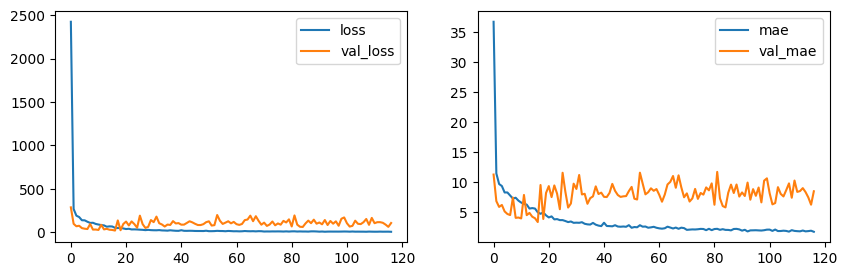

In [200]:
# loss plot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["mae", "val_mae"]].plot(ax=axes[1])

In [201]:
# predict
y_valid_pred = model.predict(X_valid).flatten()
y_valid_pred[:5]

24/24 [==============================] - 0s 1ms/step


array([ 17.314632, 118.97033 , 107.94405 ,  10.849498,  17.534185],
      dtype=float32)

In [202]:
r2 = r2_score(y_valid, y_valid_pred)
r2

0.9730865844820306

4. 배치정규화와 배치사이즈를 조정해서 모델을 개선시켰다.

- 4개의 레이어
- 배치정규화
- 배치사이즈 설정
- optimizer adam
- early_stop


기대효과

- 드롭아웃으로 개선하지 못한 모델의 성능을 배치정규화와 배치사이즈 조정을 통해서 과적합 등 여러가지 상황을 개선할 수도 있다.

- 결과: 모델의 성능은 거의 차이가 없었다.(아주 조금 떨어졌다)

In [204]:
model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, y_train,
                    epochs=1000,
                    validation_data=(X_valid, y_valid),
                    batch_size=32,
                    callbacks=[early_stop], verbose=0)
history

In [205]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
246,159.724777,9.339534,159.724777,38.332478,4.743237,38.332478
247,137.430801,8.767043,137.430801,29.840408,3.095460,29.840408
248,151.019318,9.141853,151.019318,15.495360,2.420736,15.495360
249,140.318100,8.803786,140.318100,9.120980,2.281661,9.120980
250,147.569366,9.184265,147.569366,19.312708,3.394737,19.312708


<Axes: >

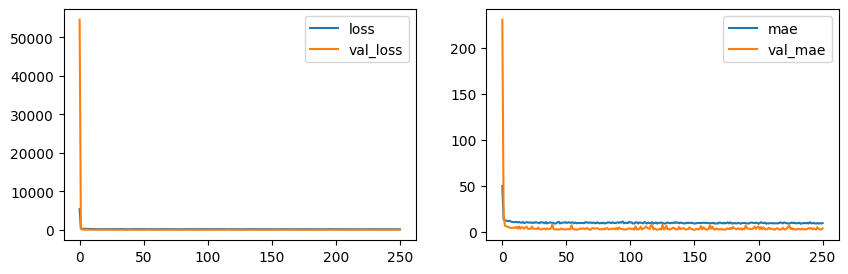

In [206]:
# loss plot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["mae", "val_mae"]].plot(ax=axes[1])

In [207]:
# predict
y_valid_pred = model.predict(X_valid).flatten()
y_valid_pred[:5]

24/24 [==============================] - 0s 2ms/step


array([ 17.877703, 136.48679 , 122.73101 ,  17.465155,  23.816523],
      dtype=float32)

In [208]:
r2 = r2_score(y_valid, y_valid_pred)
r2

0.9951586799263218

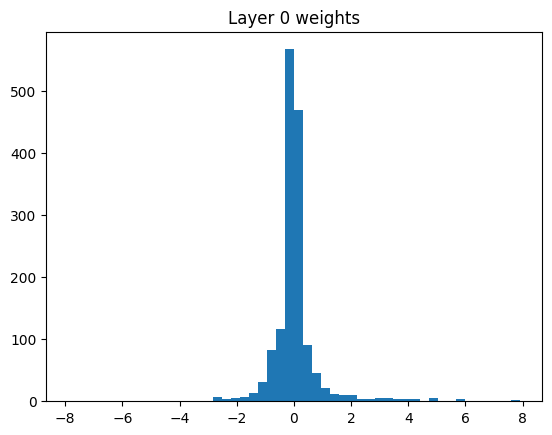

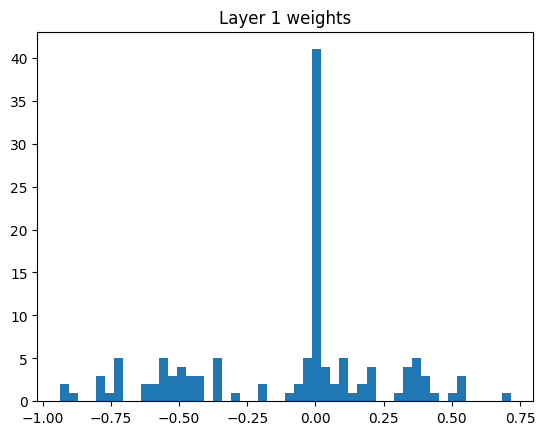

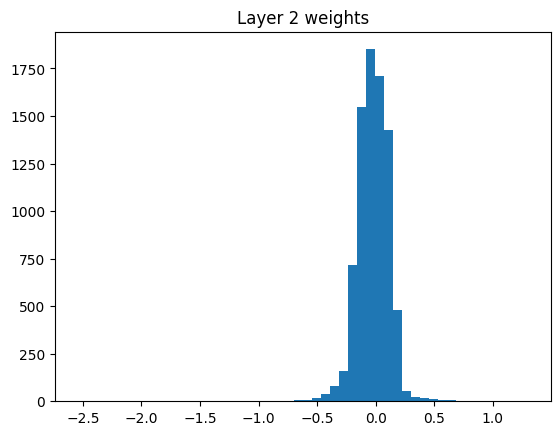

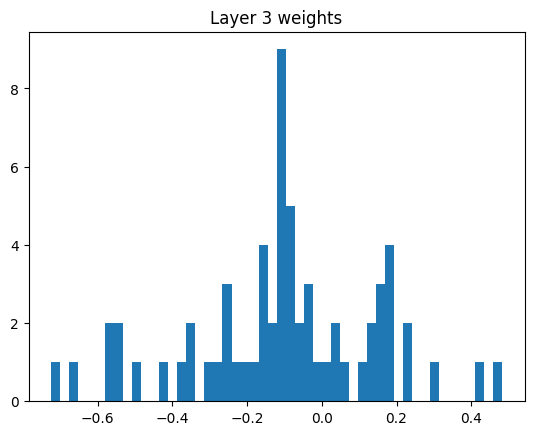

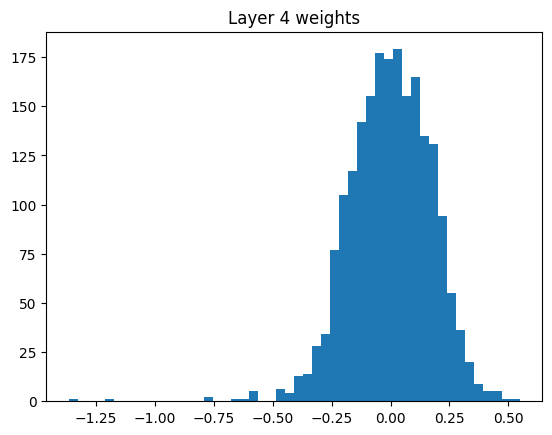

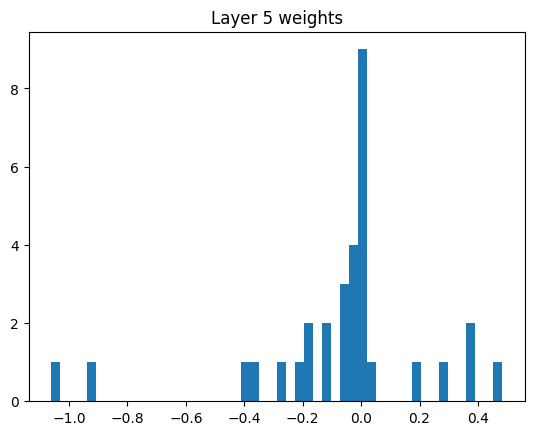

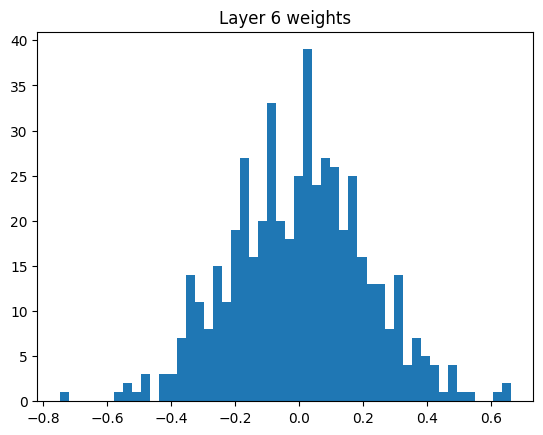

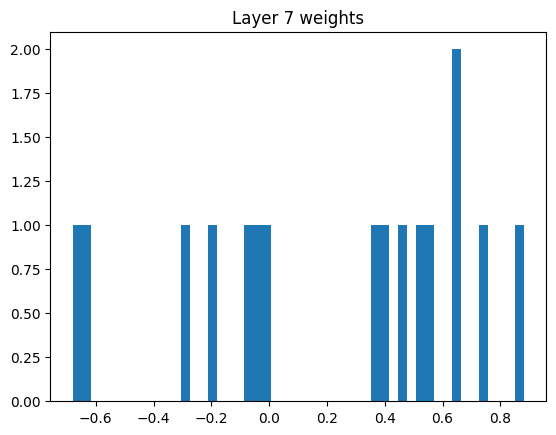

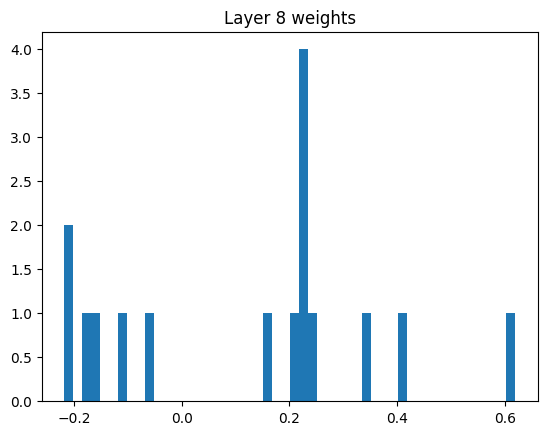

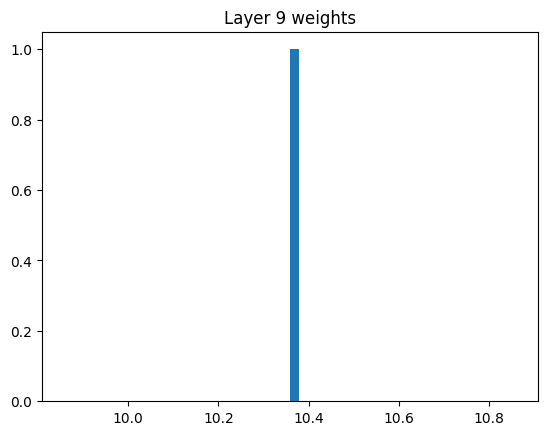

In [209]:
# 각 레이어의 가중치와 편향값 출력
for i, weight in enumerate(weights):
    plt.figure()
    plt.title(f"Layer {i} weights")
    plt.hist(weight.flatten(), bins=50)
    plt.show()

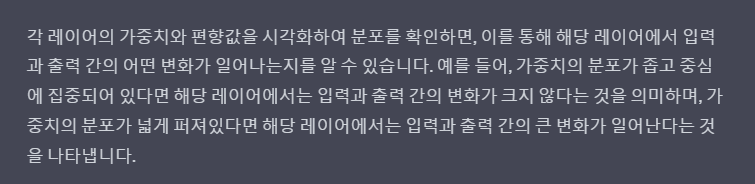

레이어가 10개인 이유

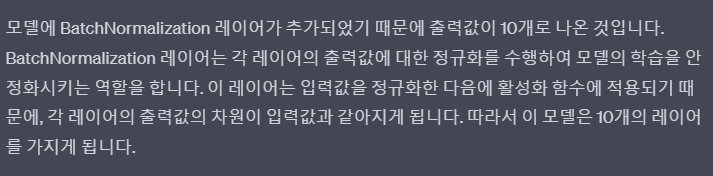

5. 교차검증을 통한 최적의 하이퍼파라미터 찾기


기대효과

- 기존의 방법(드롭아웃, 배치정규화, 레이어 늘리기 등)이 효과를 보지 못했기 때문에 과적합 문제보다는 하이퍼 파라미터를 조정하는것이 좋을 수도 있다는 판단을 했다.

- 결과: 시간이 오래걸려서 검증에 실패했다.

In [210]:
units_list = [64, 128, 256]
dropout_list = [0.01, 0.02, 0.05]
learning_rate_list = [0.0001, 0.001, 0.01]

best_score = float('inf')
best_units = None
best_dropout = None
best_learning_rate = None

for units in units_list:
    for dropout in dropout_list:
        for learning_rate in learning_rate_list:
            
            k = 10
            num_val_samples = len(X_train) // k
            num_epochs = 1000
            all_scores = []

            for i in range(k):

                # 검증 데이터 준비: k번째 분할
                val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
                val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

                # 훈련 데이터 준비: 다른 분할 전체
                partial_train_data = np.concatenate(
                    [X_train[:i * num_val_samples],
                     X_train[(i + 1) * num_val_samples:]],
                    axis=0)
                partial_train_targets = np.concatenate(
                    [y_train[:i * num_val_samples],
                     y_train[(i + 1) * num_val_samples:]],
                    axis=0)

                # 모델 구성
                model = tf.keras.Sequential([
                    tf.keras.layers.Dense(units=units, activation='relu'),
                    tf.keras.layers.Dense(units=int(units/2), activation='relu'),
                    tf.keras.layers.Dense(units=int(units/4), activation='relu'),
                    tf.keras.layers.Dense(units=1)
                ])
                model.add(tf.keras.layers.Dropout(dropout))
                model.add(tf.keras.layers.Dropout(dropout))
                model.add(tf.keras.layers.Dropout(dropout))

                # 모델 컴파일
                optimizer = tf.keras.optimizers.Adam(learning_rate)
                model.compile(loss='mse',
                              optimizer=optimizer,
                              metrics=['mae', 'mse'])

                # 모델 훈련
                history = model.fit(partial_train_data, partial_train_targets,
                                    epochs=num_epochs,
                                    batch_size=64,
                                    validation_data=(val_data, val_targets),
                                    verbose=0,
                                    callbacks=[early_stop])

                # 검증 세트로 모델 평가
                val_mse, val_mae, val_mape = model.evaluate(val_data, val_targets, verbose=0)

                # 검증 세트의 평균 점수를 저장
                all_scores.append(val_mae)

            # 10개 폴드에서의 검증 점수 평균을 계산
            average_mae = np.mean(all_scores)

            # 최적의 모델 기록
            if average_mae < best_score:
                best_score = average_mae
                best_units = units
                best_dropout = dropout
                best_learning_rate = learning_rate

print("Best MAE score:", best_score)
print("Best units:", best_units)
print("Best dropout:", best_dropout)
print("Best learning rate:", best_learning_rate)

KeyboardInterrupt: ignored